In [209]:
# Basic setting
import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 차원 축소 알고리즘

[`sklearn.datasets.make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) 데이터셋을 활용해 차원 축소 알고리즘들을 적용해보겠습니다.    
다양한 알고리즘을 적용한 뒤, LogisticRegression 모델로 학습 후 평가해보세요.

In [216]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=40, n_informative=2, n_redundant=38, n_classes=2, n_clusters_per_class=1)
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape)

(1000, 40) (1000,)
(750, 40) (250, 40)


## [P.1] Principal Component Analysis (PCA)

[`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) 알고리즘을 적용해서 데이터를 축소해봅시다.

In [217]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [218]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test)
accuracy_score(y_pred, y_test)

0.952

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

model = Pipeline([ ('pca', PCA(n_components=2)), ('lr', LogisticRegression()) ])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.952

In [220]:
def plot_dataset(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^")
    
    plt.show()

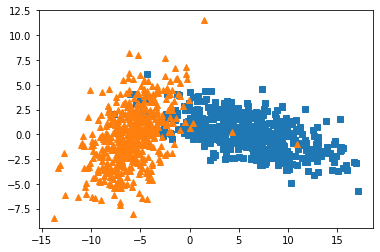

In [221]:
X_reduced = PCA(n_components=2).fit_transform(X)
plot_dataset(X_reduced, y)

## [P.2] Linear Discriminant Analysis (LDA)

LDA는 `sklearn` 패키지가 최신으로 업데이트 되면서 `sklearn.lda.LDA`의 모델 형식의 클래스에서 [`sklearn.discriminant_analysis.LinearDiscriminantAnalysis`](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)의 차원 축소 알고리즘 형태로 변모하였습니다.

In [222]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = Pipeline([ ('lda', LinearDiscriminantAnalysis(n_components=1)), ('lr', LogisticRegression()) ])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.948

## [P.3] t-Stochastic Neighbor Embedding (TSNE)

[`t-SNE`](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)를 사용하면 좀더 잘 정제된 차원 축소 데이터를 받을 수 있습니다.     
대신, t-SNE 알고리즘은 속도가 매운 느린 단점이 있으며, 축소할 수 있는 차원의 개수는 4개 이하로 정해져 있습니다.

In [228]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_embedded, y)

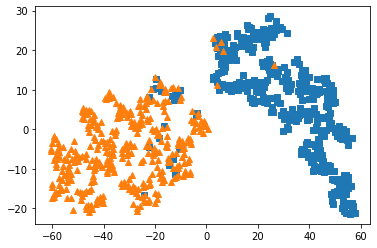

In [229]:
plot_dataset(X_train, y_train)

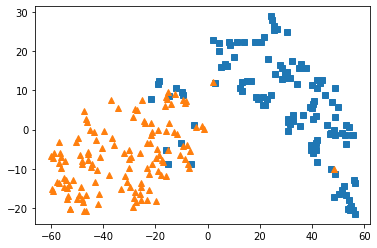

In [230]:
plot_dataset(X_test, y_test)

In [231]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.944

## [P.4] 데이터 압축 알고리즘 (SVD)

0 ~ 9 사이의 [숫자 데이터셋](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)을 통해, 데이터 압축 알고리즘인 SVD를 사용해보겠습니다.    
SVD는 numpy 패키지에서 제공하는 [`np.linalg.svd`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html)를 사용해보겠습니다.

In [235]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
print(X.shape, y.shape)

(1797, 64) (1797,)


In [237]:
y

array([0, 1, 2, ..., 8, 9, 8])

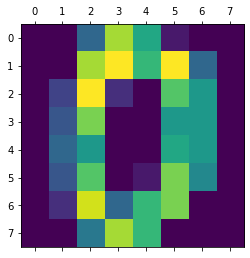

In [238]:
sample = X[0].reshape((8, 8))
plt.matshow(sample)

In [256]:
# example
a = np.random.rand(4,2)
U, s, V = np.linalg.svd(a)
print(a)

[[0.76567801 0.20042865]
 [0.30962095 0.68166111]
 [0.75848927 0.31720405]
 [0.27820039 0.13535292]]


In [257]:
S = np.zeros((4, 2))
S[:2, :2] = np.diag(s)

U.dot(S.dot(V))

array([[0.76567801, 0.20042865],
       [0.30962095, 0.68166111],
       [0.75848927, 0.31720405],
       [0.27820039, 0.13535292]])

In [258]:
U, s, V = np.linalg.svd(sample)

print(U.shape, s.shape, V.shape)

(8, 8) (8,) (8, 8)


In [259]:
S = np.zeros((8, 8))
S[:8, :8] = np.diag(s)

# 압축하고 싶은 차원의 수
dim = 4

S = S[:, :dim]
V = V[:dim, :]
sample_svd = U.dot(S.dot(V))
print(sample_svd.shape)

(8, 8)


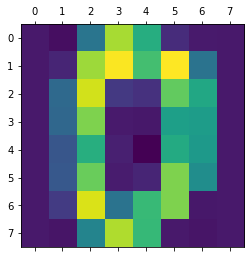

In [260]:
plt.matshow(sample_svd)